# DEMO 3.1: **k-Nearest Neighbor Classification**
<u>Nội dung</u>:
1. Phân lớp IRIS
2. Phân lớp Social_Network_Ads  

<u>Cập nhật</u>: **04/2023**




---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [1]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch03 - Supervised Learning'

Mounted at /content/gdrive


In [ ]:
## Thư viện
import joblib                as jlb
import matplotlib.pyplot     as plt
import numpy                 as np
import pandas                as pd
import seaborn               as sbn

from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier

---
## 1. **Phân lớp IRIS**
---

In [ ]:
## Tập tin dữ liệu IRIS
data = pd.read_excel(folder + '/Data/Iris.xls')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [ ]:
## Các features: sepallength, sepalwidth, petallength, petalwidth
X = data.drop('iris', axis = 1)
X.head()

## Biến target: iris
y = data.iris

print(pd.concat([X, y], axis = 1).head())

   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


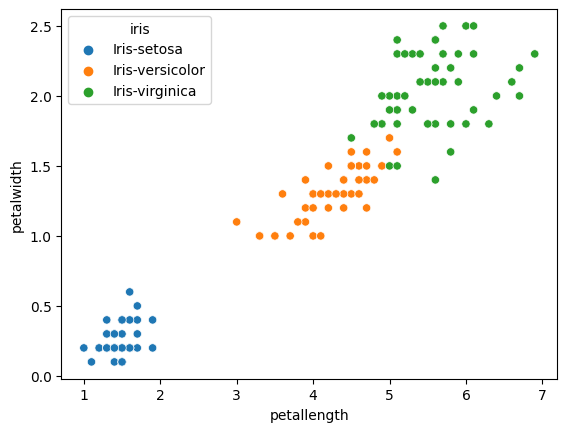

In [ ]:
## Biểu diễn trực quan dữ liệu
sbn.scatterplot(x = 'petallength', y = 'petalwidth', data = data, hue = 'iris')
plt.show()

In [ ]:
## Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [ ]:
##------------------------------------------------------------------------------
## Xây dựng mô hình kNN Classification
##------------------------------------------------------------------------------
k   = int(pow(X_train.shape[0], 1/2) / 2)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)  # huấn luyện để tạo  mô hình

KNeighborsClassifier()

In [ ]:
## Lưu trữ mô hình để khai thác về sau
jlb.dump(knn, folder + '/Output/kNN_Iris.pkl')

['/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch03 - Supervised Learning/Output/kNN_Iris.pkl']

In [ ]:
## Khai thác mô hình đã được huấn luyện để dự đoán
model  = jlb.load(folder + '/Output/kNN_Iris.pkl')

tiep = 'C'
while (tiep.upper() == 'C'):
    idx    = int(eval(input(f'Nhập chỉ số dòng từ 0 đến {X_test.shape[0]}: ')))
    idx    = idx % X_test.shape[0]
    X_new  = X_test[idx:idx + 1]
    y_pred = model.predict(X_new)
    print('Mẫu', X_new.to_string(), '    được dự đoán là', y_pred)
    tiep = input('Tiếp tục (C/K) ? ')

Nhập chỉ số dòng từ 0 đến 30: 3
Mẫu     sepallength  sepalwidth  petallength  petalwidth
16          5.4         3.9          1.3         0.4     được dự đoán là ['Iris-setosa']
Tiếp tục (C/K) ? K


In [ ]:
## Kiem tra ket qua du doan DUNG/SAI

In [ ]:
## Co bao nhieu truong hop DUNG/SAI trong tap Test
df = pd.DataFrame({'yHat':model.predict(X_test), 'y': pd.Series(y_test)})
print(f'So truong hop doan DUNG = {len(df[df.yHat == df.y])}')

So truong hop doan DUNG = 30


---
## 2. **Phân lớp Social_Network_Ads**
---

In [ ]:
## Tập tin dữ liệu Social_Network_Ads
data = pd.read_csv(folder + '/Data/Social_Network_Ads.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  EstimatedSalary_K  Purchased
0  15624510    Male   19            19000                 19          0
1  15810944    Male   35            20000                 20          0
2  15668575  Female   26            43000                 43          0
3  15603246  Female   27            57000                 57          0
4  15804002    Male   19            76000                 76          0


In [ ]:
## Các features: Gender, Age, EstimatedSalary
X = data.drop(['User ID', 'EstimatedSalary_K', 'Purchased'], axis = 1)
X.head()

## Biến target: Purchased
y = data.Purchased

print(pd.concat([X, y], axis = 1).head())

   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0


In [ ]:
## Chuyển Gender thành kiểu Numerical
sex = {'Male':1, 'Female':0}
X['Male'] = [sex[i] for i in data.Gender]
X  = X.drop(['Gender'], axis = 1)

print(pd.concat([X, y], axis = 1).head())

   Age  EstimatedSalary  Male  Purchased
0   19            19000     1          0
1   35            20000     1          0
2   26            43000     0          0
3   27            57000     0          0
4   19            76000     1          0


In [ ]:
## Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [ ]:
##------------------------------------------------------------------------------
## Xây dựng mô hình kNN Classification
##------------------------------------------------------------------------------
k   = int(pow(X_train.shape[0], 1/2) / 2)
print(f'Giá tri k = {k}')
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)  # huấn luyện để tạo  mô hình

Giá tri k = 8


KNeighborsClassifier(n_neighbors=8)

In [ ]:
## Lưu trữ mô hình để khai thác về sau
jlb.dump(knn, folder + '/Output/kNN_Social_Network_Ads.pkl')

['/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch03 - Supervised Learning/Output/kNN_Social_Network_Ads.pkl']

In [ ]:
## Khai thác mô hình đã được huấn luyện để đoán (Test set)
model  = jlb.load(folder + '/Output/kNN_Social_Network_Ads.pkl')

tiep   = 'C'
labels = np.array(['KHÔNG mua', 'MUA'])
while (tiep.upper() == 'C'):
    idx    = int(eval(input(f'Nhập chỉ số dòng từ 0 đến {X_test.shape[0]}: ')))
    idx    = idx % X_test.shape[0]
    X_new  = X_test[idx:idx + 1]
    y_pred = model.predict(X_new)
    print('Mẫu', X_new.to_string(), '      được dự đoán là', labels[y_pred])
    tiep = input('Tiếp tục (C/K) ? ')

Nhập chỉ số dòng từ 0 đến 80: 43
Mẫu      Age  EstimatedSalary  Male
272   60            42000     1       được dự đoán là ['KHÔNG mua']
Tiếp tục (C/K) ? c
Nhập chỉ số dòng từ 0 đến 80: 17
Mẫu      Age  EstimatedSalary  Male
111   37            71000     0       được dự đoán là ['KHÔNG mua']
Tiếp tục (C/K) ? 23


In [ ]:
## Chuẩn hóa dữ liệu: Age, EstimatedSalary và Male